In [47]:
import numpy as np

np.set_printoptions(linewidth=1000, precision=4, suppress=True)

In [39]:
m = 10 # number of features
N = 2  # number of samples
data = np.random.random((N,m))
data

array([[0.86566042, 0.98435687, 0.75312609, 0.42884834, 0.59611465, 0.728631  , 0.01036735, 0.2879967 , 0.91993596, 0.22029225],
       [0.15559403, 0.69254529, 0.04080459, 0.55301444, 0.64981166, 0.57665805, 0.46147926, 0.71950348, 0.8047163 , 0.70244975]])

In [42]:
# compute the mean value of the data for each feature
means = np.mean(data, axis=0)
means

array([0.51062722, 0.83845108, 0.39696534, 0.49093139, 0.62296315, 0.65264452, 0.2359233 , 0.50375009, 0.86232613, 0.461371  ])

In [43]:
# center the data around the mean
data_red = data - means
data_red

array([[ 0.3550332 ,  0.14590579,  0.35616075, -0.06208305, -0.0268485 ,  0.07598647, -0.22555595, -0.21575339,  0.05760983, -0.24107875],
       [-0.3550332 , -0.14590579, -0.35616075,  0.06208305,  0.0268485 , -0.07598647,  0.22555595,  0.21575339, -0.05760983,  0.24107875]])

In [60]:
# compute covariance
(data_red.transpose() @ data_red)/N

array([[ 0.126 ,  0.0518,  0.1264, -0.022 , -0.0095,  0.027 , -0.0801, -0.0766,  0.0205, -0.0856],
       [ 0.0518,  0.0213,  0.052 , -0.0091, -0.0039,  0.0111, -0.0329, -0.0315,  0.0084, -0.0352],
       [ 0.1264,  0.052 ,  0.1269, -0.0221, -0.0096,  0.0271, -0.0803, -0.0768,  0.0205, -0.0859],
       [-0.022 , -0.0091, -0.0221,  0.0039,  0.0017, -0.0047,  0.014 ,  0.0134, -0.0036,  0.015 ],
       [-0.0095, -0.0039, -0.0096,  0.0017,  0.0007, -0.002 ,  0.0061,  0.0058, -0.0015,  0.0065],
       [ 0.027 ,  0.0111,  0.0271, -0.0047, -0.002 ,  0.0058, -0.0171, -0.0164,  0.0044, -0.0183],
       [-0.0801, -0.0329, -0.0803,  0.014 ,  0.0061, -0.0171,  0.0509,  0.0487, -0.013 ,  0.0544],
       [-0.0766, -0.0315, -0.0768,  0.0134,  0.0058, -0.0164,  0.0487,  0.0465, -0.0124,  0.052 ],
       [ 0.0205,  0.0084,  0.0205, -0.0036, -0.0015,  0.0044, -0.013 , -0.0124,  0.0033, -0.0139],
       [-0.0856, -0.0352, -0.0859,  0.015 ,  0.0065, -0.0183,  0.0544,  0.052 , -0.0139,  0.0581]])

In [62]:
np.cov(data_red, rowvar=False, bias=True)

array([[ 0.126 ,  0.0518,  0.1264, -0.022 , -0.0095,  0.027 , -0.0801, -0.0766,  0.0205, -0.0856],
       [ 0.0518,  0.0213,  0.052 , -0.0091, -0.0039,  0.0111, -0.0329, -0.0315,  0.0084, -0.0352],
       [ 0.1264,  0.052 ,  0.1269, -0.0221, -0.0096,  0.0271, -0.0803, -0.0768,  0.0205, -0.0859],
       [-0.022 , -0.0091, -0.0221,  0.0039,  0.0017, -0.0047,  0.014 ,  0.0134, -0.0036,  0.015 ],
       [-0.0095, -0.0039, -0.0096,  0.0017,  0.0007, -0.002 ,  0.0061,  0.0058, -0.0015,  0.0065],
       [ 0.027 ,  0.0111,  0.0271, -0.0047, -0.002 ,  0.0058, -0.0171, -0.0164,  0.0044, -0.0183],
       [-0.0801, -0.0329, -0.0803,  0.014 ,  0.0061, -0.0171,  0.0509,  0.0487, -0.013 ,  0.0544],
       [-0.0766, -0.0315, -0.0768,  0.0134,  0.0058, -0.0164,  0.0487,  0.0465, -0.0124,  0.052 ],
       [ 0.0205,  0.0084,  0.0205, -0.0036, -0.0015,  0.0044, -0.013 , -0.0124,  0.0033, -0.0139],
       [-0.0856, -0.0352, -0.0859,  0.015 ,  0.0065, -0.0183,  0.0544,  0.052 , -0.0139,  0.0581]])

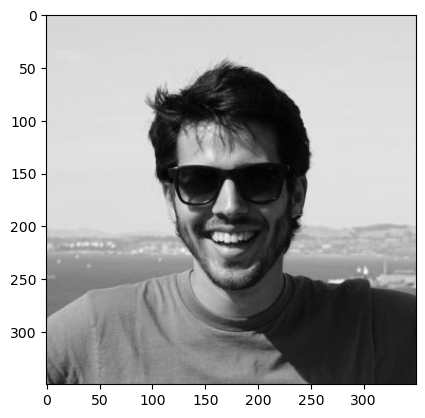

In [72]:
from PIL import Image
from matplotlib import pyplot as plt

image = np.array(Image.open('/home/stefano/Pictures/Profile/profile_bw.png'))
plt.imshow(image, 'gray')

In [75]:
U,S,V = np.linalg.svd(image)

In [76]:
n = S.shape[0]

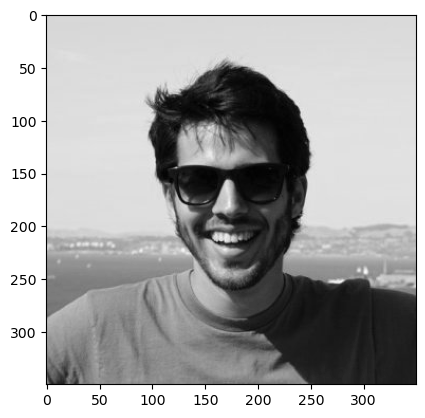

In [89]:
plt.imshow(U @ np.diag(S) @ V,'gray')

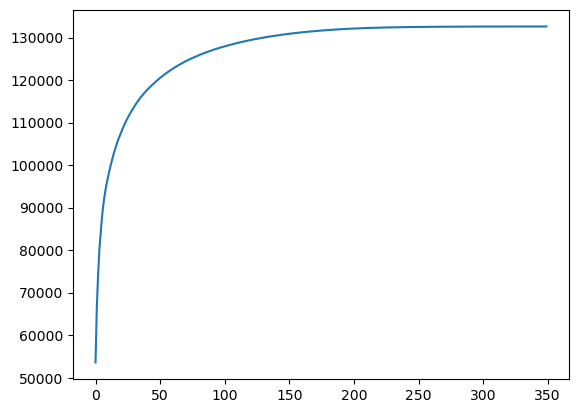

In [91]:
plt.plot(np.cumsum(S))

array([[ -7.5988,  -8.3443,  -9.6025, ..., -36.8451, -36.4252, -36.1152],
       [ -7.5988,  -8.3443,  -9.6025, ..., -36.8451, -36.4252, -36.1152],
       [ -7.5988,  -8.3443,  -9.6025, ..., -36.8451, -36.4252, -36.1152],
       ...,
       [ -9.6655, -10.6138, -12.2142, ..., -46.8666, -46.3324, -45.9381],
       [ -9.4324, -10.3578, -11.9196, ..., -45.7362, -45.2149, -44.8301],
       [ -9.1827, -10.0837, -11.6041, ..., -44.5256, -44.018 , -43.6435]])

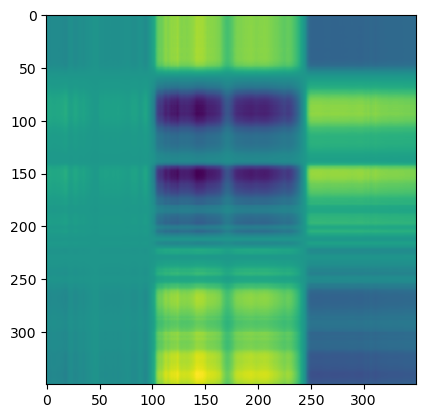

In [145]:
r = 1
plt.imshow(np.outer(U[:,r] * S[r] , V[r,:]))
U[:,r:r+1] * S[r] @ V[r:r+1,:]

array([[240.6076, 240.5421, 240.096 , ..., 228.8232, 229.2557, 229.5801],
       [240.6076, 240.5421, 240.096 , ..., 228.8232, 229.2557, 229.5801],
       [240.6076, 240.5421, 240.096 , ..., 228.8232, 229.2557, 229.5801],
       ...,
       [105.0215, 104.9929, 104.7982, ...,  99.8778, 100.0666, 100.2082],
       [104.9869, 104.9584, 104.7637, ...,  99.8449, 100.0336, 100.1752],
       [104.8751, 104.8466, 104.6522, ...,  99.7386,  99.9271, 100.0685]])

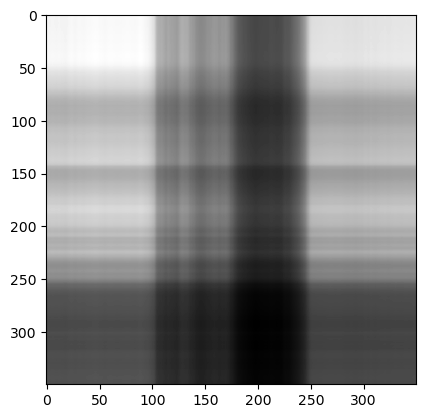

In [143]:
r=1
plt.imshow(U[:,0:r] * S[0:r] @ V[0:r,:],'gray')
U[:,0:r] * S[0:r] @ V[0:r,:]

array([[-0.0065,  0.004 ,  0.1282, ...,  0.0719,  0.0679,  0.0623],
       [-0.0802, -0.0706,  0.0521, ..., -0.1082, -0.0359, -0.0304],
       [-0.024 , -0.0138,  0.1107, ...,  0.0265, -0.0402, -0.039 ],
       ...,
       [-0.0307, -0.1021,  0.0204, ..., -0.0613, -0.0143,  0.023 ],
       [-0.0307, -0.0858,  0.0355, ..., -0.0274,  0.0735, -0.0187],
       [-0.0307, -0.0715, -0.0118, ...,  0.0966,  0.0546, -0.0696]])